<a href="https://colab.research.google.com/github/ecierobatto/Esther_Robert_Week_9_IP/blob/main/Moringa_School_Independent_Project_Week_9_12_Esther_Robert_KNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

## Specific Question
Implement a K-nearest neighbor (KNN) classifier

## Defining the Metric for Success
The f1_score and accuracy score have been used to measure the predictive power of the model before and after optimization.

## Understanding the context
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project we will be analysing what sorts of people were likely to survive the titanic.
 
Specifically we will apply KNN classifier to predict which passengers survived the tragedy.

## Recording the Experimental Design
1. Read and explore the given dataset.

2. Define the appropriateness of the available data to answer the given question. 

3. Find and deal with outliers, anomalies, and missing data within the dataset.
 
4. Perform univariate, bivariate and multivariate analysis recording your observations.  

5. Randomly partition the dataset into two parts i.e 80 - 20  sets.

6. For the given dataset, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

7. Compute the accuracy (percentage of correct classification).

8. Report the confusion matrix of each classifier.

9. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

10. Suggest and apply at least one of the optimization techniques that you learned earlier this week.

11. Provide further recommendations.

## Data Relevance

**Dataset** 

Train Dataset Source: [link text](https://archive.org/download/train5_202002/train%20%285%29.csv)

Test Dataset Source: [link text](https://archive.org/download/test1_202002/test%20%281%29.csv)

**Dataset Columns**

 Survived - Survival (0 = No; 1 = Yes)

 Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

 Name - Name

 Sex - Sex

 Age - Age

 SibSp - Number of Siblings/Spouses Aboard

 Parch - Number of Parents/Children Aboard

 Ticket - Ticket Number

 Fare - Passenger Fare (British pound)
 
 Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


# Importing Libraries


In [1]:
# Importing our libraries
#
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

# Loading the Datasets

In [2]:
# url for our Train Dataset
#
url = 'https://archive.org/download/train5_202002/train%20%285%29.csv'

# url for Test Dataset
#
url1='https://archive.org/download/test1_202002/test%20%281%29.csv'

# Reading in the Train Dataset using the Pandas
#
df=pd.read_csv(url)

# Exploring Data

In [3]:
# Previewing the first rows of our dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Previweing some information about the dataframe
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking for some statistical summariess of the dataframe
# Transposing the summaries for a better view
#
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Age has 714 rows, whereas cabin has only 204 rows, further investigation is needed.

In [6]:
# Checking for the shape and size of the dataframe
#
print(f'The shape is {df.shape} and the size is {df.size}')

The shape is (891, 12) and the size is 10692


# Data Cleansing

## Checking for and Removing duplicates

In [7]:
# Checking for duplicates
#
df.duplicated().any()

False

Our dataset has no duplicates

## Cleaning column names

In [8]:
# Previewing the columns of the dataframe
#
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# For consistency and easy reference the columns should be uniform
# Changing all column names to lower case
#
df.columns = df.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## Checking for consistency, uniformity and accuracy

In [10]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('\n')

passengerid
891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 24

Some names in the name column have further names in brackets, while others have fullstop where there  should be a comma, further probing is required 

The fare column has irregular number of decimals

The cabin, age and embarked columns have 'nan' values

In [11]:
# formatting the fare column to four decimal places
df['fare'] = df['fare'].map('{:,.4f}'.format)

In [12]:
# previewing the last rows of our dataset
df.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## Checking for and dealing with missing values

In [13]:
# Checking for missing values as a percentage
# Sorting the missing values in a descending order
#
(df.isna().mean().round(4) * 100).sort_values(ascending = False)

cabin          77.10
age            19.87
embarked        0.22
fare            0.00
ticket          0.00
parch           0.00
sibsp           0.00
sex             0.00
name            0.00
pclass          0.00
survived        0.00
passengerid     0.00
dtype: float64

In [14]:
# function for Visualising missing values
#
def visuals(df):
  df.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'pie', figsize = (8, 6))
  plt.title('Percentage of missing values', color='purple')
  plt.ylabel('Missing values', color='purple')
  #plt.xlabel('Column')
  plt.show()
# saving the visualization for presentation
plt.savefig('Percentage of missing values.jpg')

<Figure size 432x288 with 0 Axes>

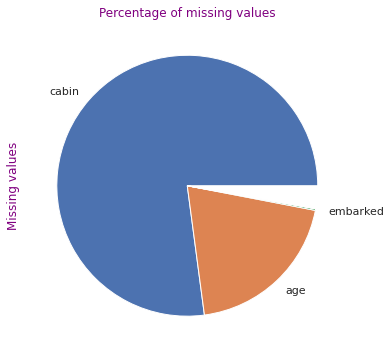

In [15]:
# Visualising missing values
#
visuals(df)

The cabin column has 77% missing values, therefore it will be dropped, the missing values in the embarked column will be filled with the mode and all other missing values in age column will be filled with their mean

In [16]:
# Taking care of missing values
# So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
# ---
# survived - This variable is obviously relevant.
# pclass - Does a passenger's class on the boat affect their survivability?
# sex - Could a passenger's gender impact their survival rate?
# age - Does a person's age impact their survival rate?
# sibsp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
# parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
# fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
# embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.
# What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. 
# And as we recall, the cabin variable is almost all missing values, so we can just drop all of these.
# 
df = df.drop(['passengerid','name','ticket','cabin'], 1)
df.head()

# Now we have the dataframe reduced down to only relevant variables, but now we need to deal with the missing values in the age and embarked variables.

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# Checking the datatype of each column
# Before filling missing values, the column dtypes should first be changed to their appriopriate datatype
#
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object

fare columns needs to be converted from object to float64

In [18]:
# converting fare column to float64
df['fare']=df['fare'].astype('float64')

In [19]:
# previewing our columns data types
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
# Filling missing values

# Filling missing values in the embarked column with mode
#
df.embarked.fillna(df.embarked.mode()[0], inplace = True)

# Filling missing values in age column with mean
# A for loop has been used for efficiency
#

df['age'].fillna(df['age'].mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
df.isnull().sum().any()

False

In [21]:
# Previewing the first 5 rows of the cleansed data
#
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex', 'embarked']
#
# Encode sex and embarked columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Checking and Dealing with Outliers

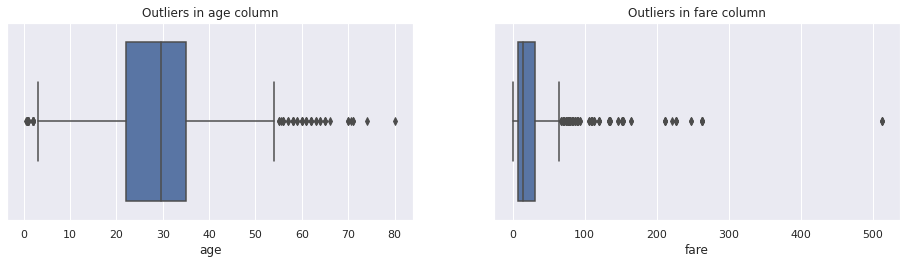

In [23]:
# Plotting boxplots to check for outliers
#

plt.figure(figsize=(16,8))

# Plotting boxplots to check for outliers in the age column
plt.subplot(2,2,1)
sns.boxplot(df['age']).set(title='Outliers in age column')
# Plotting boxplots to check for outliers in fare column
plt.subplot(2,2,2)
sns.boxplot(df['fare']).set(title='Outliers in fare column')

# saving the visualizations
plt.savefig('Outliers.jpg', bbox_inches='tight', dpi=500)

From the above analysis, the fare column has more outliers followed by the age column respectively.

In [24]:
# Removing the outliers using the IQR technique
#
# defining the columns to remove outliers from
cols = ['age', 'fare'] # one or more
# calculating the IQR
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
# Removing outliers using the calculated IQR values
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

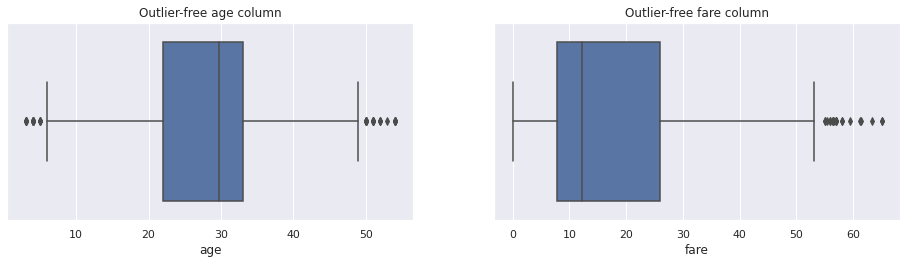

In [25]:
# Plotting boxplots to check for outliers
#

plt.figure(figsize=(16,8))

# Plotting the outlier-free age column
plt.subplot(2,2,1)
sns.boxplot(df['age']).set(title='Outlier-free age column')
# Plotting boxplots for the outlier-free  fare column
plt.subplot(2,2,2)
sns.boxplot(df['fare']).set(title='Outlier-free fare column')

# saving the visualizations
plt.savefig('Outlier-Free.jpg', bbox_inches='tight', dpi=500)

From the above chart, we can see that we have removed the outliers to some extent.

# Exploratory Data Analysis

# Descriptive statistics



## Univariate Analysis

Getting statistical summary of all numerical columns

In [26]:
# Getting statistical summary of age column
ageInfo = df['age']
ageInfo.min(), ageInfo.mean(), ageInfo.median(), ageInfo.max() 

(3.0, 28.476084686301647, 29.69911764705882, 54.0)

In [27]:
# Getting statistical summary of fare column
fareInfo = df['fare']
fareInfo.min(), fareInfo.mean(), fareInfo.median(), fareInfo.max() 

(0.0, 17.389845492371705, 12.275, 65.0)

Getting statistical summary of all categorical columns

**Visualizing Skewness and Kurtosis**

This distribution has skew 0.015117984923116801
This distribution has kurtosis 0.42844730042361245


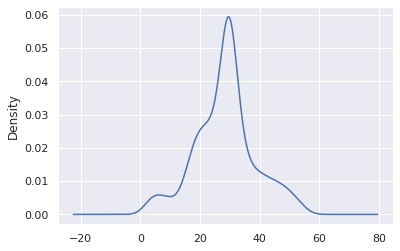

In [28]:
df['age'].plot(kind = 'density')
print('This distribution has skew', df['age'].skew())
print('This distribution has kurtosis', df['age'].kurt())

This distribution has skew 1.5190276784183168
This distribution has kurtosis 1.7262021874991347


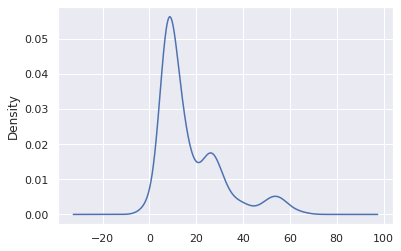

In [29]:
df['fare'].plot(kind = 'density')
print('This distribution has skew', df['fare'].skew())
print('This distribution has kurtosis', df['fare'].kurt())

From the above illustrations, we observe that:

fare is highly positively skewed 

age is approximately symmetrically distributed

Both age and fare are platykurtic

In [30]:
# Visualizing the categorical dat
# we will use the Seaborn's countplot() function.
# 
def categoricalViz(dat):
  p=sb.countplot(x=dat,data=df, palette='hls')
  pplot=p.set_title(dat+ "  "+ "column")
  return pplot
     

Text(0.5, 1.0, 'survived  column')

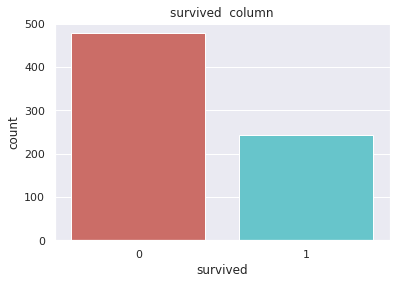

In [31]:
# plotting survived column
categoricalViz('survived')

The number of people who survived is less tan the number of people who did not survive


Text(0.5, 1.0, 'sex  column')

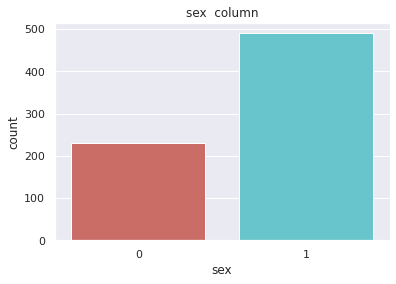

In [32]:
# plotting sex column
categoricalViz('sex')

There are more male than female

Text(0.5, 1.0, 'pclass  column')

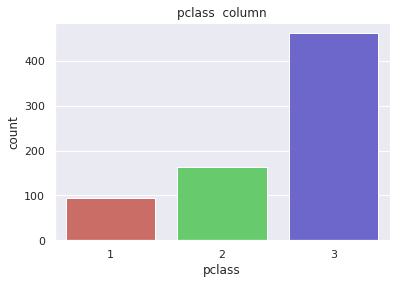

In [33]:
# plotting pclass column
categoricalViz('pclass')

More passengers were in the the third class

Text(0.5, 1.0, 'sibsp  column')

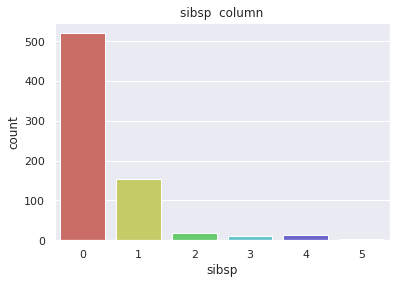

In [34]:
# plotting sibsp column
categoricalViz('sibsp')

Most of the people had no siblings/spouses Aboard

Text(0.5, 1.0, 'parch  column')

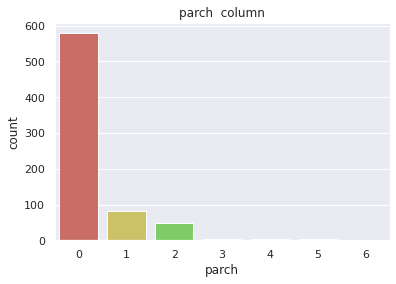

In [35]:
# plotting parch column
categoricalViz('parch')

Most people had no parents/children Aboard

Text(0.5, 1.0, 'embarked  column')

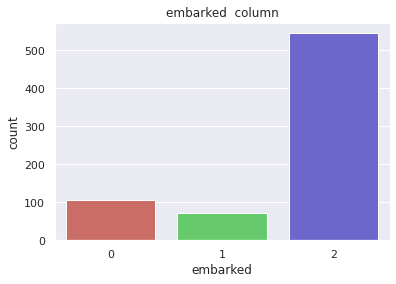

In [36]:
# plotting embarked column
categoricalViz('embarked')

Most people embarked in Port Southampton

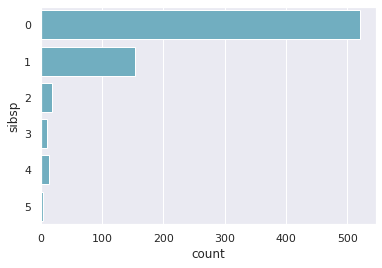

In [37]:
# visualizing sibsp column
plt.figure()
sns.countplot(y = "sibsp", data = df, color = "c")

Most people did not have siblings/spouse Abroad

## Bivariate Analysis

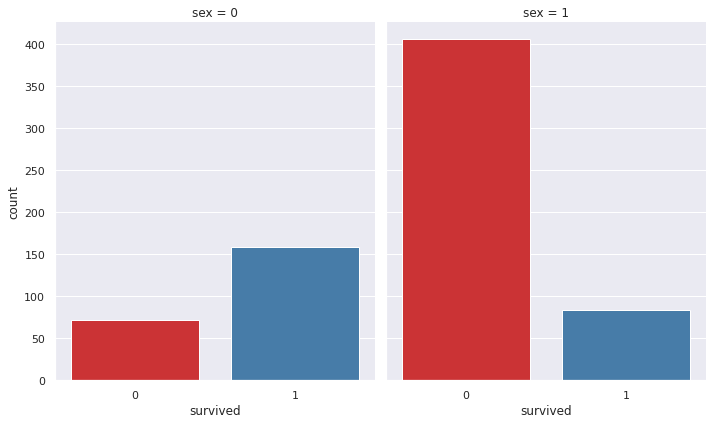

<Figure size 432x288 with 0 Axes>

In [38]:
# Plotting bar charts
#
sns.catplot("survived", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()
# saving the figure
plt.savefig('Relationship between sex and survival.jpeg')

From the above chart we can make these observations;

The dataset is  imbalanced, it has less cases of survival than non-survival cases

More females are likely to survive the titanic as compared to male

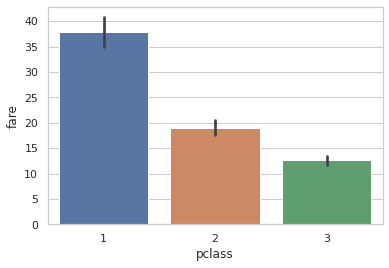

In [39]:
# Barplot to illustrate the relation between pclass and fare
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="pclass", y="fare", data=df)

From the above we observe that those in first class pay more fare followed by those in second class and lastly those in third class pay the least fare

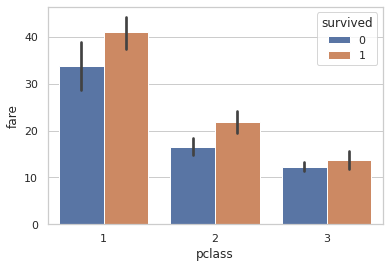

In [40]:
# Plotting how survival is related to pclass, fare 
ax = sns.barplot(x="pclass", y="fare", hue="survived", data=df)

From the above we can make the following observations:

Most of people who survived were in the first class, and had paid more fare

Most people in the first class survived

Most people survived

There were lesser people in the third class than in the first and second classes. 

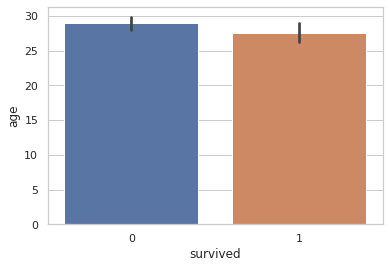

In [41]:
# Plotting the relationship between age and survival
ax = sns.barplot(x="survived", y="age", data=df)

Observations:

Most of those who survived were below 28 years

Most people above 28 years did not survive

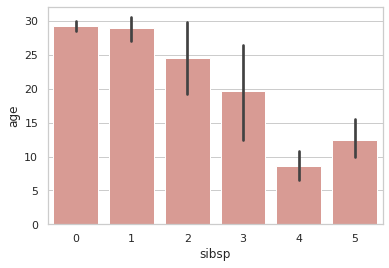

In [42]:
ax = sns.barplot(x="sibsp", y="age", data=df, color="salmon", saturation=.5)

We observe that:

most people had no siblings/spouses Abroad

The more aged people had no siblings/spouses Abroad

The people with lesser years have at least 4 siblings/spouses

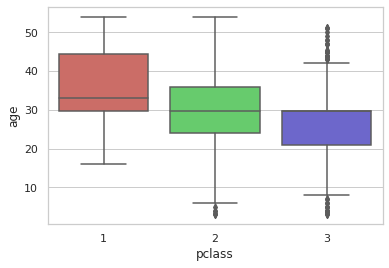

In [43]:
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sb.boxplot(x='pclass', y='age', data=df, palette='hls')

We observe that:

Those in first class have more years, followed by those in second class and then third class respectively.

# Modelling

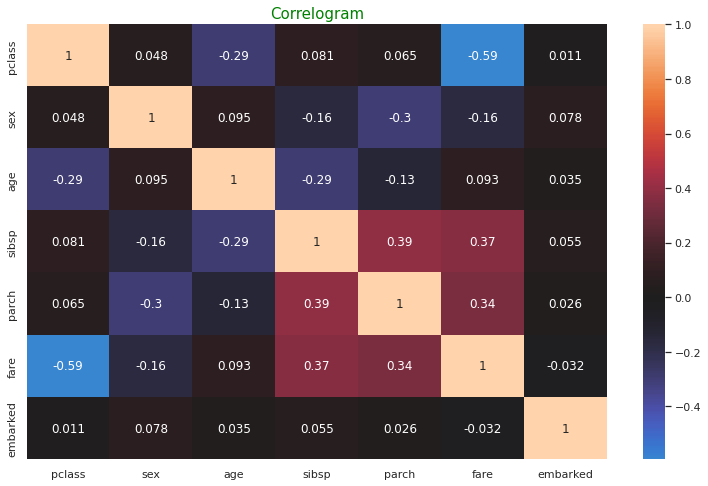

<Figure size 432x288 with 0 Axes>

In [44]:
# Remove the price column, we want to focus on our independent variables only.
independent_only = df.drop(columns=['survived'])
# function for Plotting a heatmap to show correlations between variables
#
def correlations(df1):
# Let's display the correlations between the variables
  correlations = df1.corr()
  plt.figure(figsize = (13, 8))
  sns.heatmap(correlations, annot = True, center = 0)
  plt.title('Correlogram', fontsize = 15, color = 'green')
  plt.show()
# saving the visualization
  plt.savefig('Correlations.png')
correlations(independent_only) 

From the above chart we can make these observations:

There is a strong negative relationship between pclass and fare of -0.59


## Detecting multicollinearity

In [45]:
# The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, 
# as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. 
# This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above
#
import numpy as np

pd.DataFrame(np.linalg.inv(independent_only.corr().values), index = independent_only.corr().index, columns=independent_only.corr().columns)

,pclass,sex,age,sibsp,parch,fare,embarked
pclass,2.043566,-0.086802,0.264075,-0.493649,-0.435639,1.505931,0.062817
sex,-0.086802,1.118665,-0.078654,0.037443,0.306627,0.020159,-0.092475
age,0.264075,-0.078654,1.202399,0.351813,0.020358,-0.106959,-0.061769
sibsp,-0.493649,0.037443,0.351813,1.553566,-0.242253,-0.818342,-0.115129
parch,-0.435639,0.306627,0.020358,-0.242253,1.419029,-0.598227,-0.062996
fare,1.505931,0.020159,-0.106959,-0.818342,-0.598227,2.415682,0.124673
embarked,0.062817,-0.092475,-0.061769,-0.115129,-0.062996,0.124673,1.020633


We observe that there is no multicollinearity, the VIF scores for all variables are below 5.

The VIF score for each variable is found alongside the downwards sloping diagonal.

## Splitting the dataset into the training and test sets (80 - 20  sets)


In [46]:
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the last 7 columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X=df.drop(['survived'],1).values
y=df['survived'].values


In [47]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Upsampling Minority Class To Match Majority

In [48]:
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((y[i_class0_upsampled], y[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Feature scaling

In [49]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Multivariate Analysis: Linear Discriminant Analysis

In [50]:
# Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We do not pass the value for the n_components parameter of the LDA, 
# since there are no linear discriminates that we want to retrieve. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

## Training and Predictions

In [51]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with two parameter, i.e. n_neigbours and metric. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [52]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)


## Evaluating the model
### Plotting Confusion Matrix and Classification Reports


In [53]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 13]
 [23 30]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        92
           1       0.70      0.57      0.62        53

    accuracy                           0.75       145
   macro avg       0.74      0.71      0.72       145
weighted avg       0.75      0.75      0.75       145



Text(30.5, 0.5, 'Actual')

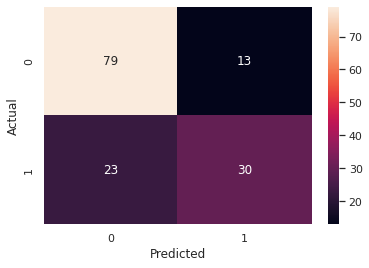

In [54]:
# creating a graph out of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 79 times the passengers was not-survived (0) and the model predicted it right and for 30 times it was survived and model predicted survived(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

## Splitting the dataset into the training and test sets (70 - 30 sets)

In [55]:
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the last 7 columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X=df.drop(['survived'],1).values
y=df['survived'].values

In [56]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Upsampling Minority Class To Match Majority

In [57]:
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((y[i_class0_upsampled], y[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Feature Scaling

In [58]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Multivariate Analysis: Linear Discriminant Analysis

In [59]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Training and Predictions

In [60]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with two parameter, i.e. n_neigbours and metric. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [61]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)


## Evaluating the model
### Plotting Confusion Matrix and Classification Reports

In [62]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  19]
 [ 23  38]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       156
           1       0.67      0.62      0.64        61

    accuracy                           0.81       217
   macro avg       0.76      0.75      0.76       217
weighted avg       0.80      0.81      0.80       217



Text(30.5, 0.5, 'Actual')

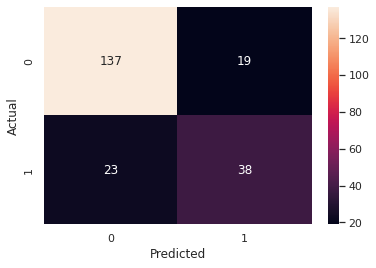

In [63]:
# creating a graph out of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 137 times the passengers was not-survived (0) and the model predicted it right and for 38 times it was survived and model predicted survived(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

## Splitting the dataset into the training and test sets (70 - 30 sets)

In [64]:
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the last 7 columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X=df.drop(['survived'],1).values
y=df['survived'].values

In [65]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

## Upsampling Minority Class To Match Majority

In [66]:
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((y[i_class0_upsampled], y[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##  Feature Scaling

In [67]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Multivariate Analysis: Linear Discriminant Analysis

In [68]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Training and Predictions

In [69]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with two parameter, i.e. n_neigbours and metric. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [70]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

## Evaluating the model
### Plotting Confusion Matrix and Classification Reports

In [71]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[158  29]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       187
           1       0.69      0.65      0.67       102

    accuracy                           0.78       289
   macro avg       0.75      0.75      0.75       289
weighted avg       0.77      0.78      0.77       289



Text(30.5, 0.5, 'Actual')

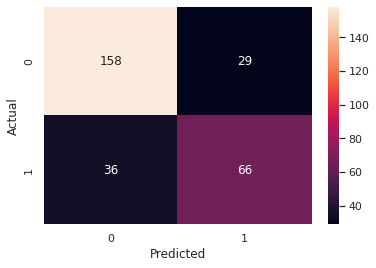

In [72]:
# creating a graph out of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')





As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 158 times the passengers was not-survived (0) and the model predicted it right and for 66 times it was survived and model predicted survived(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

# Conclusion
From the three splits, we see that the 70-30 split has the highest accuracy of 81% followed by 60-40 set with an accuracy of 78% then lastly the 80-20 set with 75% accuracy

We also notice that recall and f1-score remains the same for all the splits

Found the KNN classifier provides max accuracy of 87%.

Found high precision and recall score of 0.86 and 0.88 respectively.

Confusion matrix shows high classification accuracy with only a few values incorrect.

Overall model fit is fairly good.

# Challenging the Solution
Modeling without any optimizations( without performing any techniques involved in improving the performance of the model)

Testing the model with an external data
[link text](https://archive.org/download/test1_202002/test%20%281%29.csv)

Performing Logistic Regression

